1. Show that adding layers to a *linear* deep network, i.e., a network without
   nonlinearity $\sigma$ can never increase the expressive power of the network.
   Give an example where it actively reduces it.

For two linear layers:

$$\begin{aligned}
    \mathbf{H} & = \mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}, \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.
\end{aligned}$$

Then the final output is still a linear function of the input, making it no difference than one layer.

$$
\mathbf{O} = (\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})\mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W}^{(1)}\mathbf{W}^{(2)} + \mathbf{b}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W} + \mathbf{b}.
$$

Actively reduce? Because the number of parameters increased, it will be more difficult for the model to learn the correct parameter?



2. Compute the derivative of the pReLU activation function.

$$d(pRELU) = \left\{ \begin{matrix} 1 & x>0 \\ \alpha & x \leq 0 \end{matrix} \right.$$

3. Compute the derivative of the Swish activation function $x \operatorname{sigmoid}(\beta x)$.

$$d(x \operatorname{sigmoid}(\beta x)) = \operatorname{sigmoid}(\beta x)(1 + \beta x - \beta x \operatorname{sigmoid}(\beta x))$$

4. Show that an MLP using only ReLU (or pReLU) constructs a
   continuous piecewise linear function.

$$\begin{aligned}
    \mathbf{H} & = \sigma(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}), \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.
\end{aligned}$$

For X_i that $X_iW+b>0$, $H_i = X_iW+b$. For X_i that $X_iW+b \leq 0$, $H_i = 0$. So the function is a continuous piecewise linear function.

5. Sigmoid and tanh are very similar.
    1. Show that $\operatorname{tanh}(x) + 1 = 2 \operatorname{sigmoid}(2x)$.
    2. Prove that the function classes parametrized by both nonlinearities are identical. Hint: affine layers have bias terms, too.

(1)

$$\operatorname{tanh}(x) + 1 = \frac{2}{1+exp(-2x)} = \operatorname{sigmoid}(2x)$$

(2)

The equation in (1) illustrates that tanh(x) can be represented by a sigmoid layer and a linear layer.

6. **Assume that we have a nonlinearity that applies to one minibatch at a time, such as the batch normalization. What kinds of problems do you expect this to cause?**

(1) Batch normalization relies on the statistical properties of each feature within a minibatch to normalize the activations. If the batch size is small, the statistical properties cannot represent the real distribution.

(2) If the normalization strategy is not consistent between training and validation/testing, the model’s performance during these stages can differ significantly, leading to poor validation performance and over-optimistic test results. We often use large batch size in training, however, the testing situation might need to inference each sample at a time(batchsize=1).

7. Provide an example where the gradients vanish for the sigmoid activation function.

The gradient of the sigmoid function is as follows. As the input diverges from 0 in either direction, the derivative approaches 0.

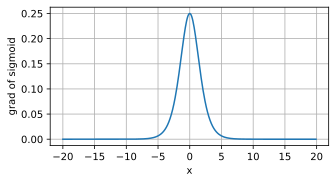

In [10]:
import torch
from d2l import torch as d2l

x = torch.arange(-20.0, 20.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

Suppose we have a deep neural network with multiple hidden layers, all using the sigmoid activation function. The derivative of the loss with respect to the input can be calculated using the chain rule. If the gradient of the sigmoid function is close to zero for large positive inputs and we multiply these small gradients during backpropagation, we will end up with vanishing gradients. 